In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline 

In [2]:
import pandas as pd
df = pd.read_csv('titanic/train.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning:

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age:

In [8]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [9]:
# Changing the null values
df['Age'].fillna(mean_age, inplace = True)
# Verifying that it worked
df['Age'].isna().sum()

0

## Embarked:

In [5]:
df['Embarked'].value_counts()
#Will fill NAs with 'S' as it's the most common by far

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df['Embarked'].isna().sum()

2

In [12]:
df['Embarked'].fillna('S', inplace = True)
df['Embarked'].value_counts()
#Fixed

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Cabin:

# EDA:

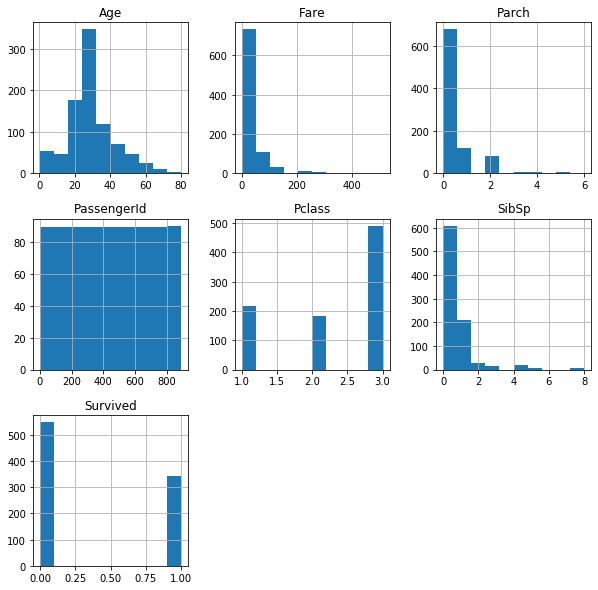

In [15]:
df.hist(figsize = (10,10));

# Feature Engineering:

# Model Building:

In [28]:
X_vals = ['Survived', 'Fare', 'Pclass', 'SibSp']
X = df[X_vals]
y = df['Age']

display(X.head())
display(y.head())

,Survived,Fare,Pclass,SibSp
0,0,7.2500,3,1
1,1,71.2833,1,1
2,1,7.9250,3,0
3,1,53.1000,1,1
4,0,8.0500,3,0


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

## Simple Model:

In [21]:
import statsmodels.api as sm

In [29]:
base_model = sm.OLS(y, X).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Age   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              657.1
Date:                Fri, 24 Jul 2020   Prob (F-statistic):                   1.89e-263
Time:                        12:05:42   Log-Likelihood:                         -3750.3
No. Observations:                 891   AIC:                                      7509.
Df Residuals:                     887   BIC:                                      7528.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Survived       3.9058      1.113      3.510      0.000       1.722       6.090
Fare           0.1500      0.011     13.441      0.000       0.128       0.172
Pclass         9.6960      0.275     35.222      0.000       9.156      10.236
SibSp         -3.2226      0.512     -6.293      0.000      -4.228      -2.218
==============================================================================
Omnibus:                       46.168   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.099
Skew:                           0.462   Prob(JB):                     1.99e-14
Kurtosis:                       3.920   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""